In [1]:
from pandas import read_csv, DataFrame
from numpy import linspace

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier

from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
pima = read_csv('../input/pima-indians-diabetes-database/diabetes.csv')

In [3]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
pima.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Missing Values

In [6]:
print('Values 0:', repr(pima[pima.Glucose == 0].shape[0]))
print(pima[pima.Glucose == 0].groupby('Outcome')['Outcome'].count())

Values 0: 5
Outcome
0    3
1    2
Name: Outcome, dtype: int64


In [7]:
Glucose_0 = pima[(pima['Glucose']== 0)]
pima[(pima['Glucose']== 0) & (pima['Outcome'] == 0)] = Glucose_0[Glucose_0['Outcome']== 0].replace(0, pima[(pima['Outcome']== 0)].mean())
pima[(pima['Glucose']== 0) & (pima['Outcome'] == 1)] = Glucose_0[Glucose_0['Outcome']== 1].replace(0, pima[(pima['Outcome']== 1)].mean())

In [8]:
print("Values 0:", repr(pima[pima.BloodPressure == 0].shape[0]))
print(pima[pima.BloodPressure == 0].groupby('Outcome')['Outcome'].count())

Values 0: 35
Outcome
0    19
1    16
Name: Outcome, dtype: int64


In [9]:
BloodPressure_0 = pima[(pima['BloodPressure']== 0)]
pima[(pima['BloodPressure']== 0) & (pima['Outcome'] == 0)] = BloodPressure_0[BloodPressure_0['Outcome']== 0].replace(0, pima[(pima['Outcome']== 0)].mean())
pima[(pima['BloodPressure']== 0) & (pima['Outcome'] == 1)] = BloodPressure_0[BloodPressure_0['Outcome']== 1].replace(0, pima[(pima['Outcome']== 1)].mean())

In [10]:
print("Values 0: " + repr(pima[pima.SkinThickness == 0].shape[0]))
print(pima[pima.SkinThickness == 0].groupby('Outcome')['Outcome'].count())

Values 0: 194
Outcome
0    121
1     73
Name: Outcome, dtype: int64


In [11]:
SkinThickness_0 = pima[(pima['SkinThickness']== 0)]
pima[(pima['SkinThickness']== 0) & (pima['Outcome'] == 0)] = SkinThickness_0[SkinThickness_0['Outcome']== 0].replace(0, pima[(pima['Outcome']== 0)].mean())
pima[(pima['SkinThickness']== 0) & (pima['Outcome'] == 1)] = SkinThickness_0[SkinThickness_0['Outcome']== 1].replace(0, pima[(pima['Outcome']== 1)].mean())

In [12]:
print("Número de casos anormais na espessura das dobras cutâneas: " + repr(pima[pima.SkinThickness > 60].shape[0]))
print(pima[pima.SkinThickness > 60]['SkinThickness'])
print(pima[pima.SkinThickness > 60].groupby('Outcome')['Outcome'].count())

Número de casos anormais na espessura das dobras cutâneas: 2
445    63.0
579    99.0
Name: SkinThickness, dtype: float64
Outcome
1    2
Name: Outcome, dtype: int64


In [13]:
pima['SkinThickness'].iloc[579] = pima['SkinThickness'].mean()

In [14]:
print("Missing Values: " + repr(pima[pima.Insulin == 0].shape[0]))
print(pima[pima.Insulin == 0].groupby('Outcome')['Outcome'].count())

Missing Values: 141
Outcome
0    94
1    47
Name: Outcome, dtype: int64


In [15]:
Insulin_0 = pima[(pima['Insulin'] == 0)]
pima[(pima['Insulin']== 0) & (pima['Outcome'] == 0)] = Insulin_0[Insulin_0['Outcome']== 0].replace(0, pima[(pima['Outcome']== 0)].mean())
pima[(pima['Insulin']== 0) & (pima['Outcome'] == 1)] = Insulin_0[Insulin_0['Outcome']== 1].replace(0, pima[(pima['Outcome']== 1)].mean())

In [16]:

print("Missing Values: " + repr(pima[pima.BMI == 0].shape[0]))
print(pima[pima.BMI == 0].groupby('Outcome')['Outcome'].count())

Missing Values: 1
Outcome
0    1
Name: Outcome, dtype: int64


In [17]:
# Substitua o valor zero pelo valor médio das classes
BMI_0 = pima[(pima['BMI']== 0)] 
pima[(pima['BMI']== 0) & (pima['Outcome'] == 0)] = BMI_0[BMI_0['Outcome']== 0].replace(0, pima[(pima['Outcome']== 0)].mean())
pima[(pima['BMI']== 0) & (pima['Outcome'] == 1)] = BMI_0[BMI_0['Outcome']== 1].replace(0, pima[(pima['Outcome']== 1)].mean())

<AxesSubplot:>

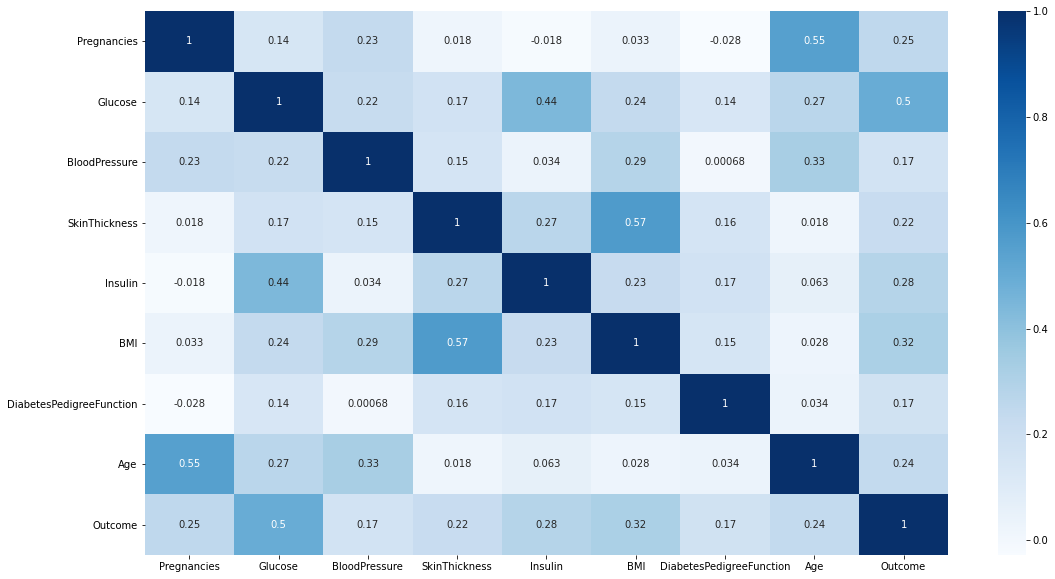

In [18]:
plt.figure(figsize=(18,10))
sns.heatmap(pima.corr(), annot=True, cmap=plt.cm.Blues)

<AxesSubplot:xlabel='Outcome', ylabel='count'>

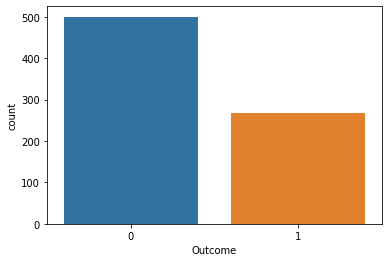

In [19]:
sns.countplot(pima['Outcome'])

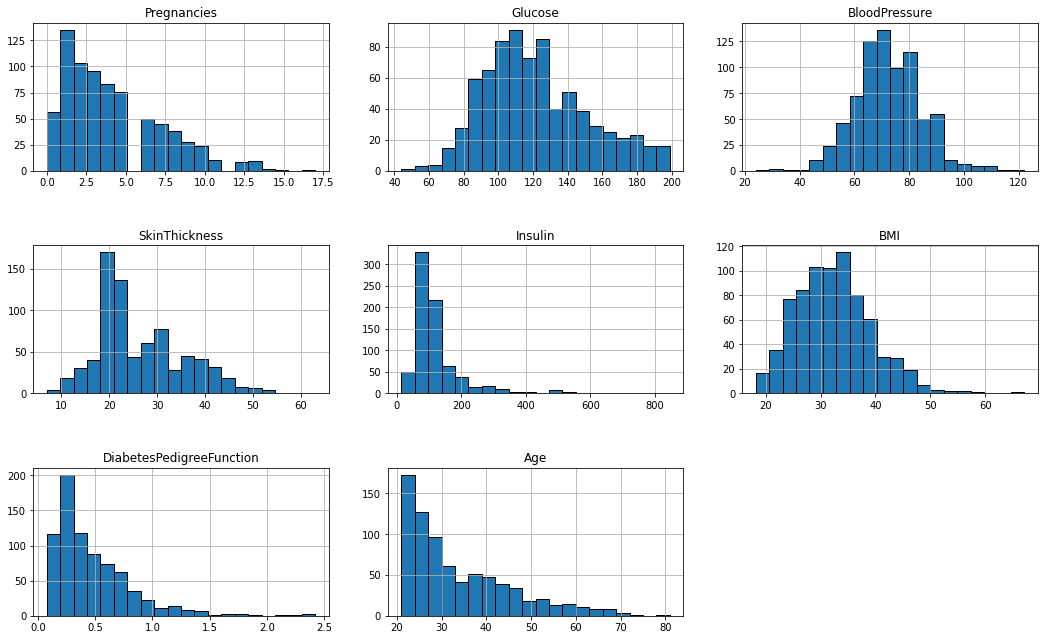

In [20]:
columns = pima.columns[:8]
plt.subplots(figsize=(18,15))
length = len(columns)

for i,j in zip(columns,range(length)):
    plt.subplot((length/2), 3, j+1)
    plt.subplots_adjust(wspace=0.2, hspace=0.5)
    pima[i].hist(bins=20, edgecolor='black')
    plt.title(i)
plt.show()

Pregnancies                    AxesSubplot(0.125,0.657941;0.227941x0.222059)
Glucose                     AxesSubplot(0.398529,0.657941;0.227941x0.222059)
BloodPressure               AxesSubplot(0.672059,0.657941;0.227941x0.222059)
SkinThickness                  AxesSubplot(0.125,0.391471;0.227941x0.222059)
Insulin                     AxesSubplot(0.398529,0.391471;0.227941x0.222059)
BMI                         AxesSubplot(0.672059,0.391471;0.227941x0.222059)
DiabetesPedigreeFunction          AxesSubplot(0.125,0.125;0.227941x0.222059)
Age                            AxesSubplot(0.398529,0.125;0.227941x0.222059)
Outcome                        AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

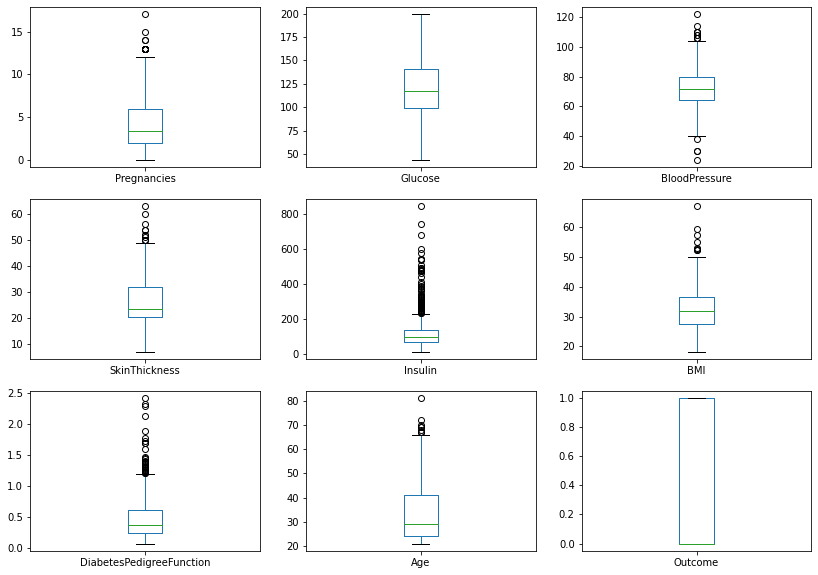

In [21]:
pima.plot(kind='box', subplots=True, layout=(3,3), figsize=(14,10))

In [22]:
x = pima.drop(columns=['Outcome'])
y = pima['Outcome']

scaler = MinMaxScaler()
x = scaler.fit_transform(x)

x_treino, x_teste, y_treino, y_teste = train_test_split(x , y, test_size=0.20, stratify=y)

In [23]:
modelos = []
modelos.append(('Decision Tree Classifier',DecisionTreeClassifier()))
modelos.append(('ExtraTrees Classifier',ExtraTreesClassifier()))
modelos.append(('Gradient Boosting Classifier',GradientBoostingClassifier()))
modelos.append(('Random Forest Classifier',RandomForestClassifier()))

row_index = 0 

for nome, modelo in modelos:
    modelo.fit(x_treino, y_treino)
    prev = modelo.predict(x_teste)    
    acc = accuracy_score(y_teste, prev)
    row_index += 1
    print(nome, acc)

Decision Tree Classifier 0.8441558441558441
ExtraTrees Classifier 0.8246753246753247
Gradient Boosting Classifier 0.8961038961038961
Random Forest Classifier 0.8766233766233766


In [24]:
params = {'n_estimators' : [1, 2, 4, 8, 16, 32, 64, 100, 200],
          'learning_rate' : [0.1, 0.01],
          'max_depth' : [3,4,5]}
         
model = GridSearchCV(GradientBoostingClassifier(), params, cv=10, n_jobs=-1).fit(x_treino, y_treino)

prev = GradientBoostingClassifier(**model.best_params_).fit(x_treino, y_treino)
prev = model.predict(x_teste)
acc = accuracy_score(y_teste, prev)
print(nome, acc)

Random Forest Classifier 0.8961038961038961
